In [15]:
import pandas as pd
import pandas_datareader.data as web

##### Read CSV from URL

In [9]:
url = 'https://tinyurl.com/4tfzdbmh'
data = pd.read_csv(url)

In [10]:
data.head()

,Date,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
0,2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
1,2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2,2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
3,2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
4,2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


##### Read CSV from pandas web datareader

* To install use:
```pip install pandas-datareader```
* Data: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#yahoo-finance-data

In [120]:
data_web = web.DataReader(['GE'], 'yahoo', start='2019-01-01', end='2019-02-01')

In [61]:
data_web.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GE,GE,GE,GE,GE,GE
Date,,,,,,
2019-01-02,61.2,61.9,62.9,57.0,57.4,16816033
2019-01-03,61.2,62.0,63.1,59.8,61.7,15983370
2019-01-04,62.5,63.3,63.5,61.4,63.0,15610894
2019-01-07,66.4,67.2,67.6,63.8,65.8,23358972
2019-01-08,65.0,65.8,69.5,65.5,68.5,19107452


#### Exploratory data analysis

In [41]:
pd.set_option('precision', 1)
data_web.describe()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GE,GE,GE,GE,GE,GE
count,22.0,22.0,22.0,22.0,22.0,2.2e+01
mean,67.5,68.3,69.6,66.4,67.7,1.6e+07
std,4.0,4.0,4.6,4.2,4.3,7.5e+06
min,61.2,61.9,62.9,57.0,57.4,9.4e+06
25%,65.9,66.8,68.2,65.4,65.9,1.2e+07
50%,67.6,68.5,69.2,66.6,68.2,1.4e+07
75%,68.7,69.5,70.6,67.4,68.9,1.6e+07
max,77.4,78.4,82.8,76.6,78.5,4.5e+07


In [38]:
data_web.shape

(22, 6)

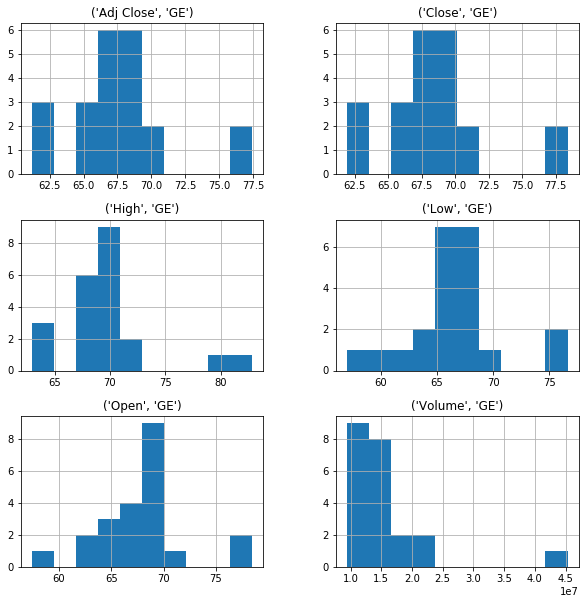

In [52]:
from matplotlib import pyplot
data_web.hist(figsize=(10,10));

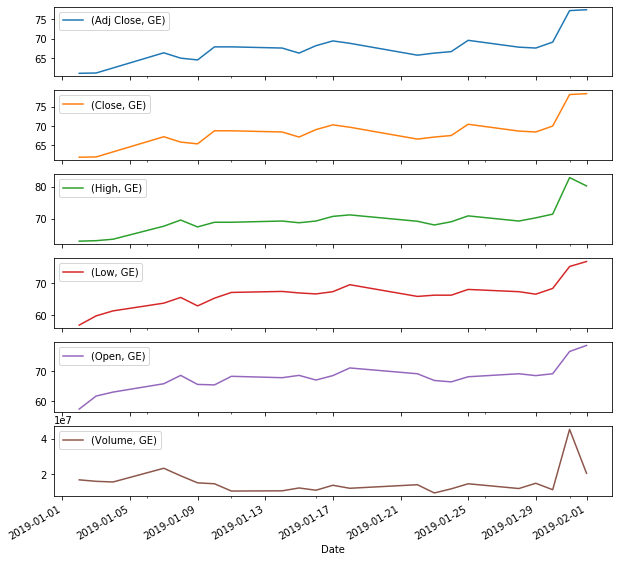

In [73]:
data_web.plot(subplots=True, figsize=(10, 10));

In [ ]:
dataset_web.dropna(axis=0)

In [121]:
person_data = pd.read_csv('person_data.csv')

In [77]:
person_data

,name,age,height
0,Marija,12.0,120.0
1,Jovana,20.0,160.0
2,Alex,45.0,165.0
3,Ivo,50.0,NaN
4,Pero,NaN,180.0


In [83]:
person_data = person_data.dropna(axis=0)

In [80]:
person_data.fillna(0)

,name,age,height
0,Marija,12.0,120.0
1,Jovana,20.0,160.0
2,Alex,45.0,165.0
3,Ivo,50.0,0.0
4,Pero,0.0,180.0


In [122]:
person_data.columns # .fillna(person_data['age'].mean())

Index(['name', ' age', ' height'], dtype='object')

In [123]:
person_data.columns = pd.Index(map(lambda col: col.strip(), person_data.columns))

In [126]:
person_data['age'] = person_data['age'].fillna(person_data['age'].mean())

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
pd.set_option('precision', 6)
pd.DataFrame(scaler.fit_transform(data_web), columns=data_web.columns, index=data_web.index)


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GE,GE,GE,GE,GE,GE
Date,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.206217
2019-01-03,0.004672,0.004673,0.007722,0.145098,0.204379,0.183031
2019-01-04,0.084112,0.084112,0.030888,0.223529,0.266423,0.172660
2019-01-07,0.322430,0.322430,0.235521,0.345098,0.397810,0.388406
2019-01-08,0.238317,0.238318,0.332046,0.435294,0.529197,0.270022
2019-01-09,0.210281,0.210280,0.223938,0.301961,0.386861,0.158986
2019-01-10,0.415888,0.415888,0.297297,0.423529,0.379562,0.144634
2019-01-11,0.415888,0.415888,0.297297,0.513725,0.514598,0.029985


In [136]:
data_web

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GE,GE,GE,GE,GE,GE
Date,,,,,,
2019-01-02,61.2,61.9,62.9,57.0,57.4,16816033
2019-01-03,61.2,62.0,63.1,59.8,61.7,15983370
2019-01-04,62.5,63.3,63.5,61.4,63.0,15610894
2019-01-07,66.4,67.2,67.6,63.8,65.8,23358972
2019-01-08,65.0,65.8,69.5,65.5,68.5,19107452
2019-01-09,64.6,65.4,67.4,62.9,65.5,15119819
2019-01-10,67.9,68.8,68.8,65.3,65.4,14604395
2019-01-11,67.9,68.8,68.8,67.1,68.2,10487009
